In [1]:
import numpy as np
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 15:23:15--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.11’

housing.csv.11      100%[===================>]   1.36M  1.28MB/s    in 1.1s    

2023-09-25 15:23:16 (1.28 MB/s) - ‘housing.csv.11’ saved [1423529/1423529]



In [3]:
housing_df = pd.read_csv("housing.csv")

In [4]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.shape

(20640, 10)

### EDA

In [6]:
for col in housing_df.columns:
    print(col)
    print(housing_df[col].unique()[:5])
    print(housing_df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



In [7]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

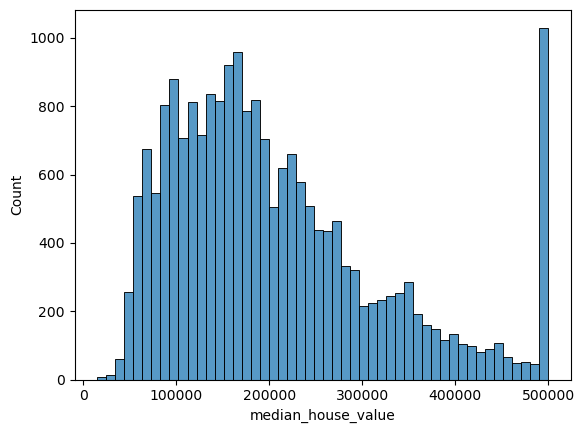

In [11]:
sns.histplot(housing_df.median_house_value, bins=50)

In [12]:
housing_subset = housing_df.loc[housing_df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [13]:
housing_subset.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9246,-120.06,36.97,38.0,1542.0,364.0,1220.0,334.0,1.6250,52800.0,INLAND
1318,-121.77,37.99,4.0,5623.0,780.0,2429.0,716.0,5.4409,205100.0,INLAND
11614,-118.07,33.79,26.0,4422.0,624.0,1936.0,625.0,6.4288,320700.0,<1H OCEAN
13218,-117.68,34.00,5.0,3761.0,580.0,2335.0,648.0,5.7338,225400.0,INLAND
15122,-116.94,32.84,32.0,1607.0,253.0,778.0,262.0,4.5278,166300.0,<1H OCEAN


In [14]:
housing_subset.shape

(15687, 10)

In [15]:
selected_cols = [
    'latitude', 'longitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'
]

In [16]:
haus_df = housing_subset[selected_cols]

# Question 1 

In [17]:
haus_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [18]:
haus_df['population'].median()

1195.0

### validation framework 

In [19]:
n = len(haus_df)

In [20]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [21]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [22]:
df_train = haus_df.iloc[:n_train]
df_val = haus_df.iloc[n_train:n_train+n_val]
df_test = haus_df.iloc[n_train+n_val:]

In [23]:
idx = np.arange(n)

In [24]:
np.random.seed(42)
np.random.shuffle(idx)

In [25]:
df_train = haus_df.iloc[idx[:n_train]]
df_val = haus_df.iloc[idx[n_train:n_train+n_val]]
df_test = haus_df.iloc[idx[n_train+n_val:]]

In [26]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [27]:
y_train =  np.log1p(df_train['median_house_value'].values)
y_val =  np.log1p(df_val['median_house_value'].values)
y_test =  np.log1p(df_test['median_house_value'].values)

In [28]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

In [29]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [30]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
df_train_im_zero = df_train.copy()
df_val_im_zero = df_val.copy()
df_test_im_zero = df_test.copy()

In [32]:
df_train_im_zero = df_train_im_zero.fillna({"total_bedrooms": 0}).copy()
df_val_im_zero = df_val_im_zero.fillna({"total_bedrooms": 0}).copy()
df_test_im_zero = df_test_im_zero.fillna({"total_bedrooms": 0}).copy()

In [33]:
df_test_im_zero.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Using Zero 

In [34]:
base = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
X_train = df_train_im_zero[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

In [35]:
w0

10.862982108103482

In [36]:
w

array([ 6.28042885e-03, -1.13878059e-04,  2.41801154e-04, -1.18362318e-04,
        8.69077011e-04,  2.35130044e-01])

In [37]:
y_pred = w0 + X_train.dot(w)

In [38]:
score = rmse(y_train, y_pred)
print(round(score,2))

0.39


<Axes: ylabel='Count'>

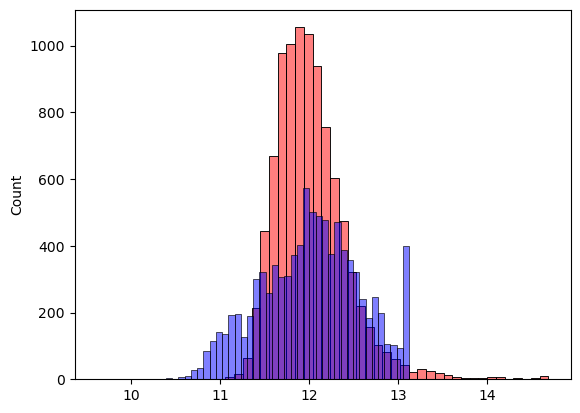

In [39]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### Using mean 

In [40]:
df_train_im_mean = df_train.copy()

In [41]:
fmean = y_train.mean()

In [42]:
fmean

12.015274212810096

In [43]:
base = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
X_train_mean = df_train_im_mean[base].fillna(fmean).values
w0, w = train_linear_regression(X_train_mean, y_train)

In [44]:
w0

10.862721801765424

In [45]:
w

array([ 6.28130144e-03, -1.14053355e-04,  2.44692648e-04, -1.18268066e-04,
        8.66654805e-04,  2.35182704e-01])

In [46]:
y_pred_mean = w0 + X_train.dot(w)

In [47]:
score = rmse(y_train, y_pred_mean)
print(round(score,2))

0.39


<Axes: ylabel='Count'>

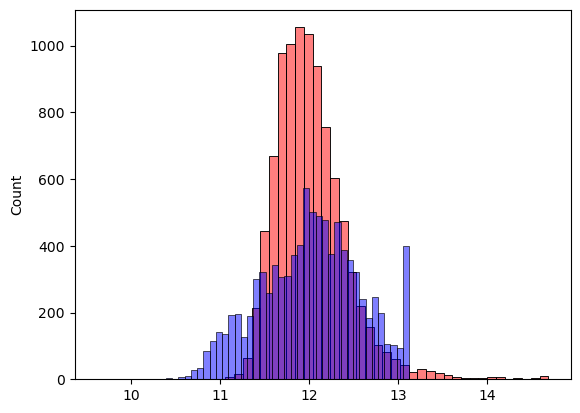

In [48]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [49]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# Question 4

In [50]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [51]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.39871645252653065

In [57]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),10)
    
    print(r, w0, score)

0 10.862982108103482 0.3987153196
1e-06 10.86298208782161 0.3987153197
0.0001 10.86298007946868 0.3987153309
0.001 10.862961821813848 0.3987154326
0.01 10.862779248684193 0.3987164525
0.1 10.86095385864719 0.398726922
1 10.84273402102922 0.3988585309
5 10.762499272541046 0.4000229508
10 10.663878837800912 0.4027488961


# Question 5

In [59]:
for seed_val in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed_val)
    np.random.shuffle(idx)
    df_train = haus_df.iloc[idx[:n_train]]
    df_val = haus_df.iloc[idx[n_train:n_train+n_val]]
    df_test = haus_df.iloc[idx[n_train+n_val:]]
    y_train =  np.log1p(df_train['median_house_value'].values)
    y_val =  np.log1p(df_val['median_house_value'].values)
    y_test =  np.log1p(df_test['median_house_value'].values)
    base = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
    X_train = prepare_X(df_train)
    X_train = df_train_im_zero[base].fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(seed_val, score)


0 0.567720268174613
1 0.5606692230367103
2 0.5697523305458062
3 0.5681137091311289
4 0.5593273510719967
5 0.551410576995471
6 0.5590189796376523
7 0.5753130328121665
8 0.5596447854165741
9 0.5609193232597691


In [61]:
round(np.std([
    0.567720268174613, 0.5606692230367103, 
    0.5697523305458062, 0.5681137091311289,
    0.5593273510719967, 0.551410576995471,
    0.5590189796376523, 0.5753130328121665,
    0.5596447854165741, 0.5609193232597691]
), 3)

0.007

# Question 6

In [62]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = haus_df.iloc[idx[:n_train]]
df_val = haus_df.iloc[idx[n_train:n_train+n_val]]
df_test = haus_df.iloc[idx[n_train+n_val:]]
y_train =  np.log1p(df_train['median_house_value'].values)
y_val =  np.log1p(df_val['median_house_value'].values)
y_test =  np.log1p(df_test['median_house_value'].values)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4012633247437204